## Introduction
In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular Jupyter Notebook, you'll practice creating single-variable plots for categorical data.

The cells where you are expected to contribute, are highlighted with **TO DO** markdown. 

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# The `solutions_multivariate.py` is a Python file available in the Notebook server that contains solution to the TO DO tasks.
# The solution to each task is present in a separate function in the `solutions_univ.py` file. 
# Do not refer to the file untill you attempt to write code yourself. 
from solutions_multivariate import *

## About the Dataset
In this workspace, you'll make use of this data set describing various car attributes, such as fuel efficiency. The cars in this dataset represent about 3900 sedans tested by the EPA from 2013 to 2018. This dataset is a trimmed-down version of the data found [here](https://catalog.data.gov/dataset/fuel-economy-data).

In [2]:
df = pd.read_csv('data/fuel-econ.csv')
df.shape

(3929, 20)

In [3]:
df.head(4)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5


### Exercise 1: Encoding 3 numeric variables
Let's look at the relationship between fuel mileage in highway settings (`highway`), engine displacement (`displ`), and co2 emissions (`co2`).  
**Use a _scatter plot_ to depict the data, with a color encoding.**

As you work through this, identify:
1. What is the independent variable?
2. What is most appropriate variable for color encoding?
3. Describe the relationships.

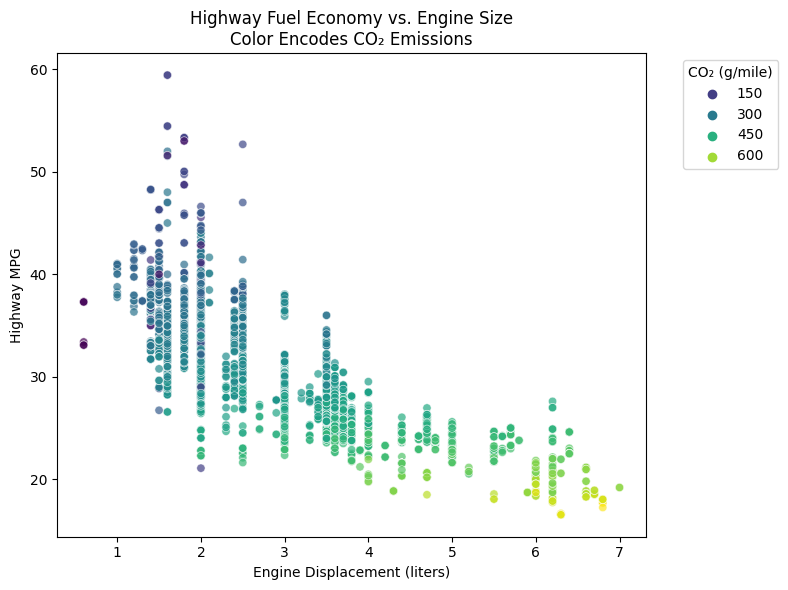

In [4]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Scatter: x = engine size (displ), y = highway mpg
# Color encodes CO2 emissions
sns.scatterplot(
    data=df,
    x='displ',
    y='highway',
    hue='co2',
    palette='viridis',
    alpha=0.7
)

plt.xlabel("Engine Displacement (liters)")
plt.ylabel("Highway MPG")
plt.title("Highway Fuel Economy vs. Engine Size\nColor Encodes CO₂ Emissions")
plt.legend(title="CO₂ (g/mile)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

1️⃣ What is the independent variable?

Engine displacement (displ)
Engine displacement is a design/engineering parameter, and highway fuel efficiency is an outcome of that.
So typically:

Independent variable (x-axis): displ

Dependent variable (y-axis): highway

2️⃣ What is the most appropriate variable for color encoding?

CO₂ emissions (co2)

Why?

It is numeric and continuous → perfect for a color gradient.

It is strongly related to both engine size and fuel efficiency.

It adds a meaningful 3rd dimension to the plot.

3️⃣ Describe the relationships
✔️ Engine size vs. highway MPG

As engine displacement increases, highway MPG decreases.
(Negative relationship.)

✔️ Engine size vs. CO₂ emissions

Larger engines → higher CO₂ emissions (darker colors in the viridis palette).

✔️ Highway MPG vs. CO₂ emissions

Cars with higher highway MPG emit less CO₂.

Low-MPG cars cluster in the high-CO₂ color range.

### Expected Output: Exercise #1

Once you've created your chart, run the cell below to check the output from our solution. **Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.**


    1. The engine displacement is the independent variable. This is essentially engine size, and
    determines efficiency and emissions.
    
    2. One could choose either efficiency or CO2 emissions for the color axis, but here I choose
    efficiency because mpg is easier for me to think about.
    
    3. These two variables are correlated, since more efficient engines emit fewer emissions. We see that
    here. We also see a non-linear relationship with engine size. This is important, as it means even a
    slightly smaller engine will likely be much more efficient.

    


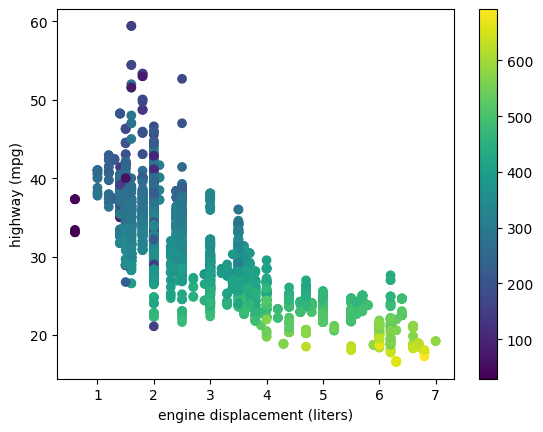

In [5]:
encodings_solution_1()

### Exercise 2: Color Encoding
Use a box plot to compare the green house gas rating (`ghgScore`) for Premium and Regular gas cars (`fuelType`) for Ford and Chevrolet (`make`).

For this excercise, you will need to cut or mask your data to select only the `fuelType` and `make` of interest.

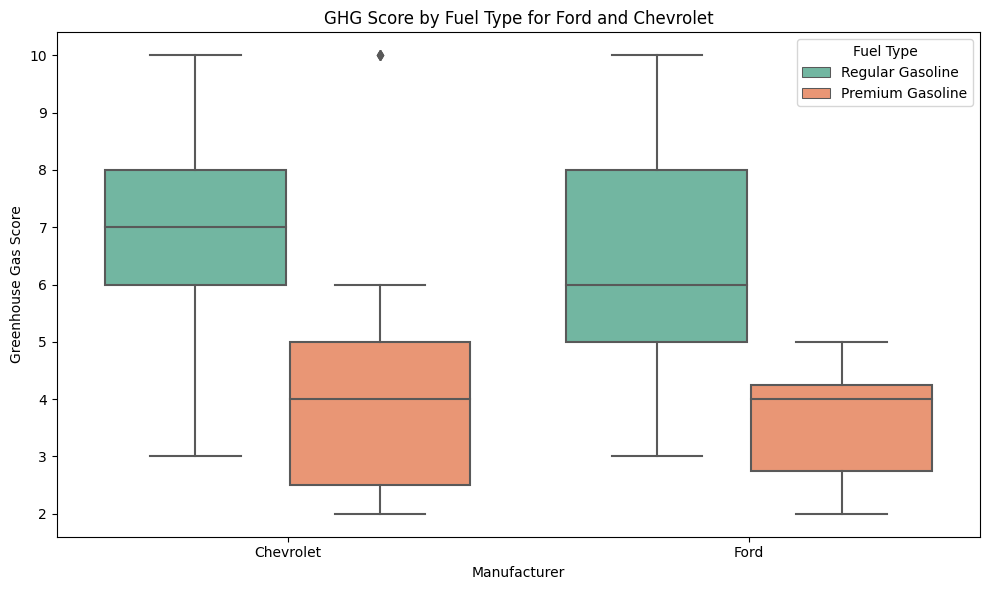

In [6]:
# YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for Ford and Chevrolet
df_sub = df[df['make'].isin(['Ford', 'Chevrolet'])]

# Filter fuel types to only Premium and Regular gasoline
df_sub = df_sub[df_sub['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_sub,
    x='make',
    y='ghgScore',
    hue='fuelType',
    palette='Set2'
)

plt.xlabel("Manufacturer")
plt.ylabel("Greenhouse Gas Score")
plt.title("GHG Score by Fuel Type for Ford and Chevrolet")

plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

✔️ Comparing GHG scores

Premium gasoline vehicles may cluster slightly differently than regular gasoline ones.

You can see variation between Ford and Chevrolet in how efficient their models are.

Color encoding allows clear comparison of Premium vs Regular in each brand.

### Expected Output: Exercise #2


    Chevrolet has a much high ghgScore for Regular Gas, and a much tighter distribution. It also has a
    slightly higher rating for Premium gas, but it's difficult to say because both have such prominent
    left skews. More specific commentary would require looking at histograms, or perhaps violin plots.

    


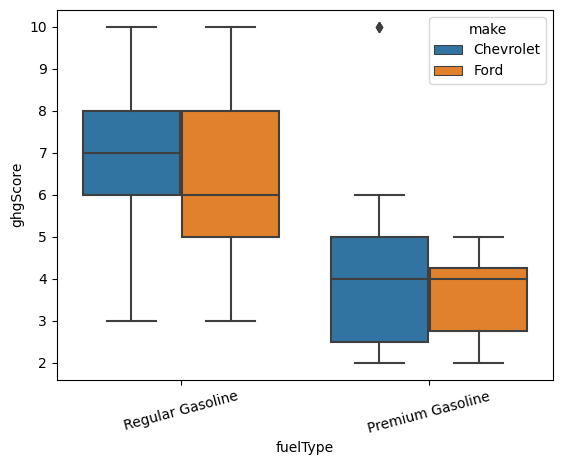

In [7]:
encodings_solution_2()

### Exercise 3: Multiple Encoding
Plot the relationship between engine size ('displ', in liters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

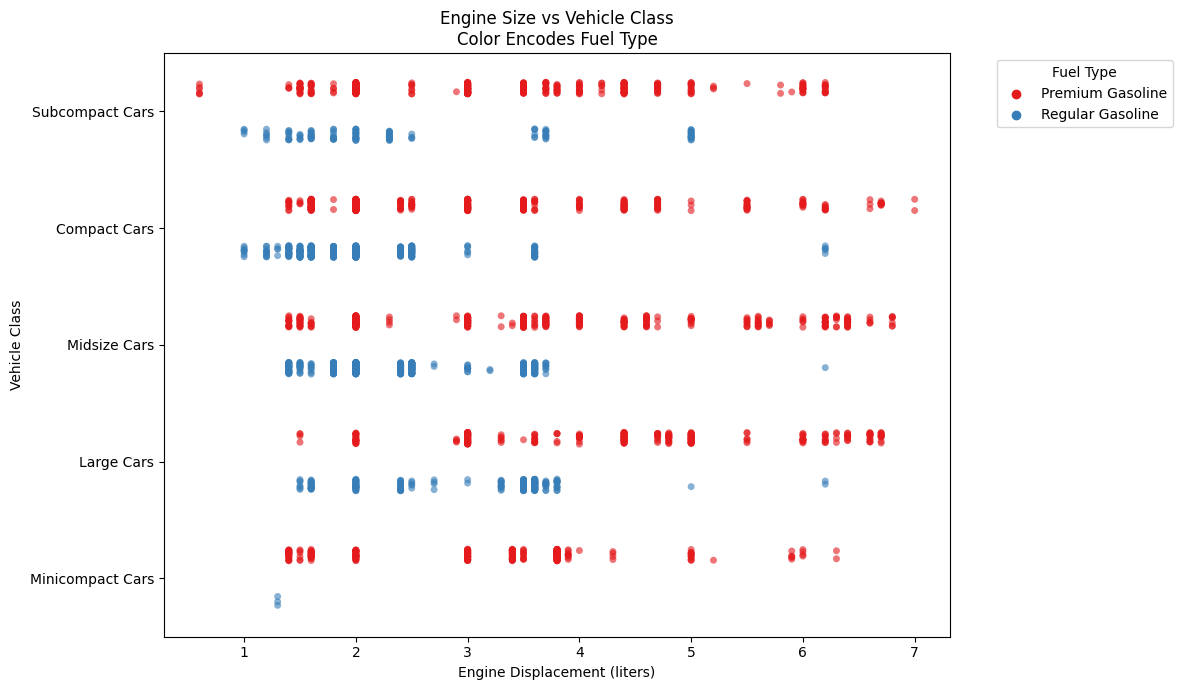

In [8]:
# YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only Premium and Regular gasoline cars
df_sub = df[df['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

plt.figure(figsize=(12, 7))

sns.stripplot(
    data=df_sub,
    x='displ',
    y='VClass',
    hue='fuelType',
    dodge=True,
    alpha=0.6,
    palette='Set1'
)

plt.xlabel("Engine Displacement (liters)")
plt.ylabel("Vehicle Class")
plt.title("Engine Size vs Vehicle Class\nColor Encodes Fuel Type")
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

1. Larger vehicle classes tend to have larger engines

SUVs, large sedans, and performance classes are clustered around 3.0 liters and above.

Compact or subcompact cars mostly have 1.5–2.5 liter engines.

2. Premium gasoline engines tend to be larger

Premium gasoline vehicles (red dots) cluster toward the right side of the plot.

Regular gasoline vehicles (blue dots) are more common among smaller displacement engines.

3. Fuel type varies by class

Subcompact and compact classes include both Regular and Premium, but:

Premium engines often appear in sportier subclasses.

Large and performance classes show more Premium usage.

4. Some vehicle classes have wide variation

Certain classes (e.g., Midsize Cars) show a wide spread from small to medium-large engines, indicating model diversity.

### Expected Output: Exercise #2


    I went with a clustered box plot on this task since there were too many levels to make a clustered
    violin plot accessible. The plot shows that in each vehicle class, engine sizes were larger for
    premium-fuel cars than regular-fuel cars. Engine size generally increased with vehicle class within
    each fuel type, but the trend was noisy for the smallest vehicle classes.

    


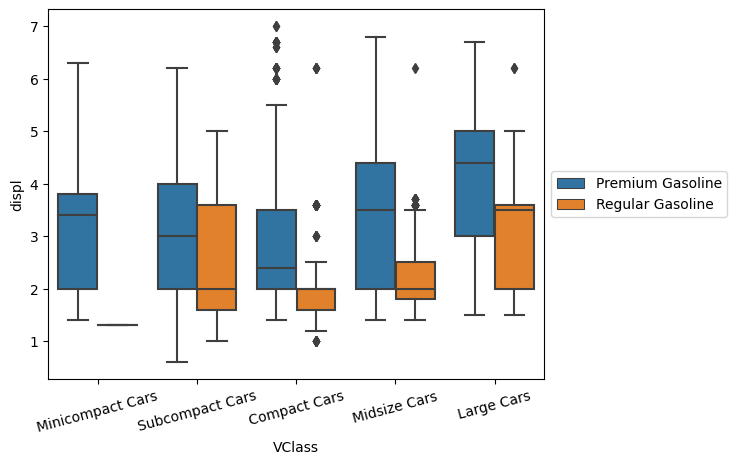

In [9]:
encodings_solution_3()

If you're interested in seeing the code used to generate the solution plots, you can find it in the `solution_multivariate.py` script in the workspace folder. You can navigate there by clicking on the Jupyter icon in the upper left corner of the workspace. Spoiler warning: the script contains solutions for all of the workspace exercises in this lesson, so take care not to spoil your practice!